In [17]:
import pandas as pd
import numpy as np
import missingno as msno
import re 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df=pd.read_csv('/content/netflix_titles.csv')

In [75]:
df.head(30)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,extract_value
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,absent,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90 min
1,s2,TV Show,Blood & Water,UNKNOWN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2 Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",not_register,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1 Season
3,s4,TV Show,Jailbirds New Orleans,UNKNOWN,absent,not_register,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1 Season
4,s5,TV Show,Kota Factory,UNKNOWN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2 Seasons
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",not_register,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1 Season
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",not_register,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91 min
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125 min
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9 Seasons
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104 min


In [40]:
df.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8797,s8798,TV Show,Zak Storm,UNKNOWN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8800,s8801,TV Show,Zindagi Gulzar Hai,UNKNOWN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,UNKNOWN,absent,not_register,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
df.shape

(8807, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [13]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [14]:

df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [15]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [11]:
df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

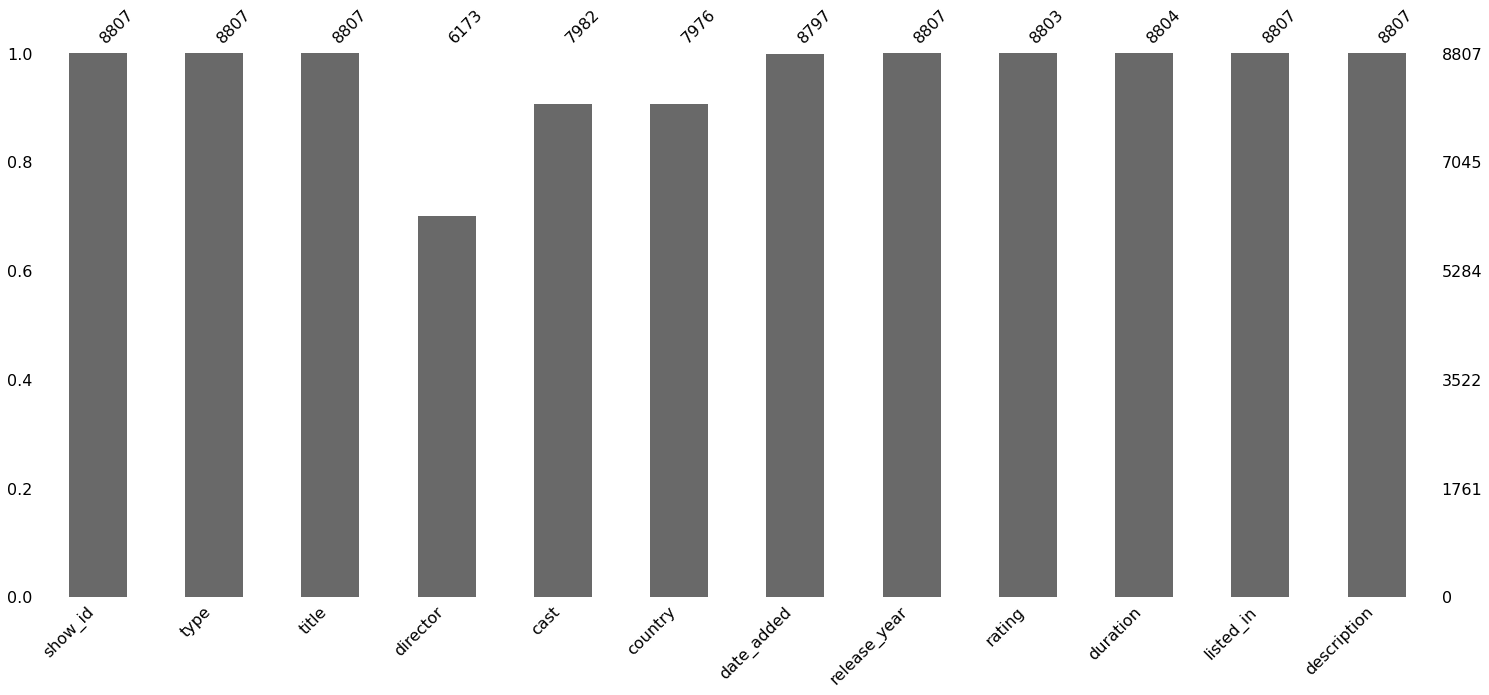

In [22]:
msno.bar(df)


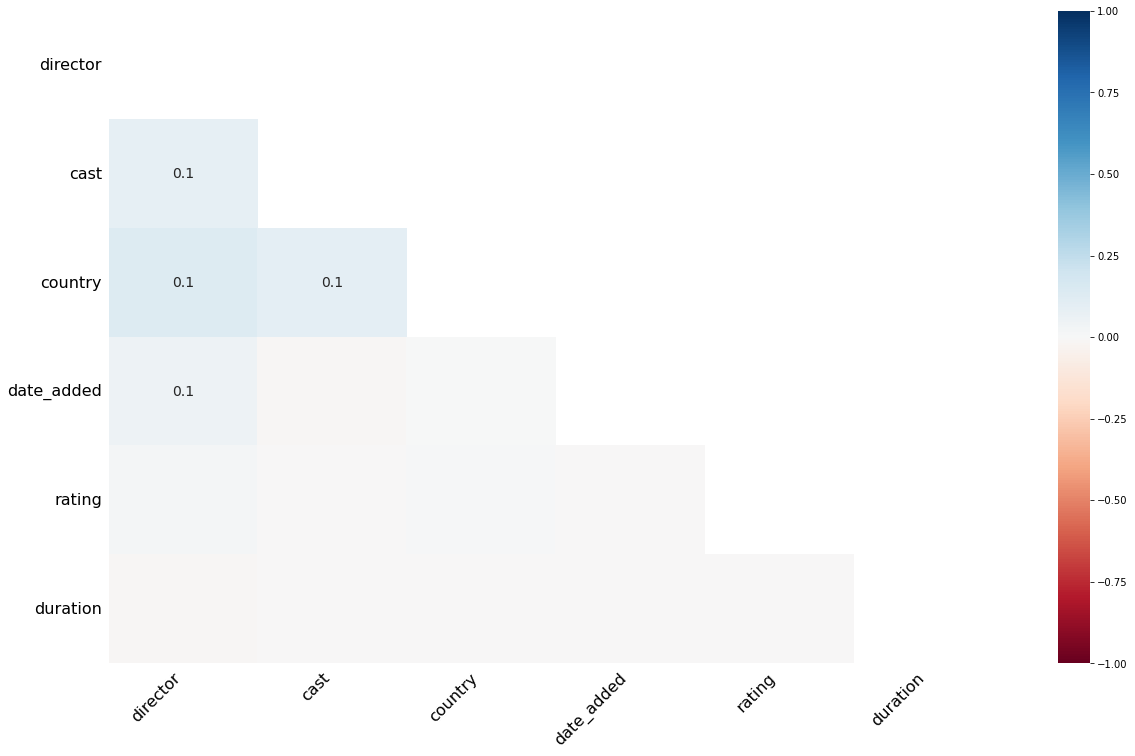

In [23]:
msno.heatmap(df)

Remove nan value and cleaning data

In [25]:
df.fillna({'director':'UNKNOWN'},inplace=True)

In [34]:
df.fillna({'cast':'absent'},inplace=True)

In [26]:
df.fillna({'country':'not_register'},inplace=True)

In [33]:
df.fillna({'date_added':'forgttrn'},inplace=True)

In [28]:
df.fillna({'release_year':'not_recorded'},inplace=True)

In [29]:
df.fillna({'rating':'lost'},inplace=True)

for duration we need to extract time as number from string

In [64]:
extract_value= df['duration'].str.extract('(\d+)')
print(extract_value)



        0
0      90
1       2
2       1
3       1
4       2
...   ...
8802  158
8803    2
8804   88
8805   88
8806  111

[8807 rows x 1 columns]


In [83]:
extract_value=np.where((extract_value < 10), extract_value*160,extract_value )

In [69]:
extract_value=extract_value.convert_dtypes(float)


In [70]:
extract_value=extract_value.astype(np.float)

In [84]:
print(extract_value)

[   0    0    0 ... 8804 8805 8806]


In [92]:
extract_value.mean()

4402.994890428068

In [86]:
df.fillna({'extract_value':'4403 min'},inplace=True)

To confirm from get rid of all nans

In [87]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
extract_value    0
dtype: int64

In [88]:
df.duplicated().sum()

0

In [89]:
mask=df.duplicated()
df.loc[mask]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,extract_value


some notes

we dealing with big data to some extent need to focuse on some cols that represent labels for my recommendation system  
This cols from discribtion of data (Tv show,type(moives),title,release-year)

for this we need to reset-index to enable deal with it 

At first fliter movies from data set and create index for each moive 

In [98]:
df_movies= df[df['type']=='Movie'].reset_index()

convert name of movie to lower case for modeling

In [99]:
df_movies.title= df_movies.title.str.lower()
df_movies['index']= df_movies.index

In [100]:
df_movies.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,extract_value
0,0,s1,Movie,dick johnson is dead,Kirsten Johnson,absent,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90 min
1,1,s7,Movie,my little pony: a new generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",not_register,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91 min
2,2,s8,Movie,sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125 min
3,3,s10,Movie,the starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104 min
4,4,s13,Movie,je suis karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127 min


Type (Tv show)

In [101]:
df_shows= df[df['type']=='Tv Show'].reset_index()
df_shows.title= df_shows.title.str.lower()
df_shows['index']= df_shows.index

In [102]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [103]:
df_shows.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,extract_value


Exploratory Data Analysis

At first for Type

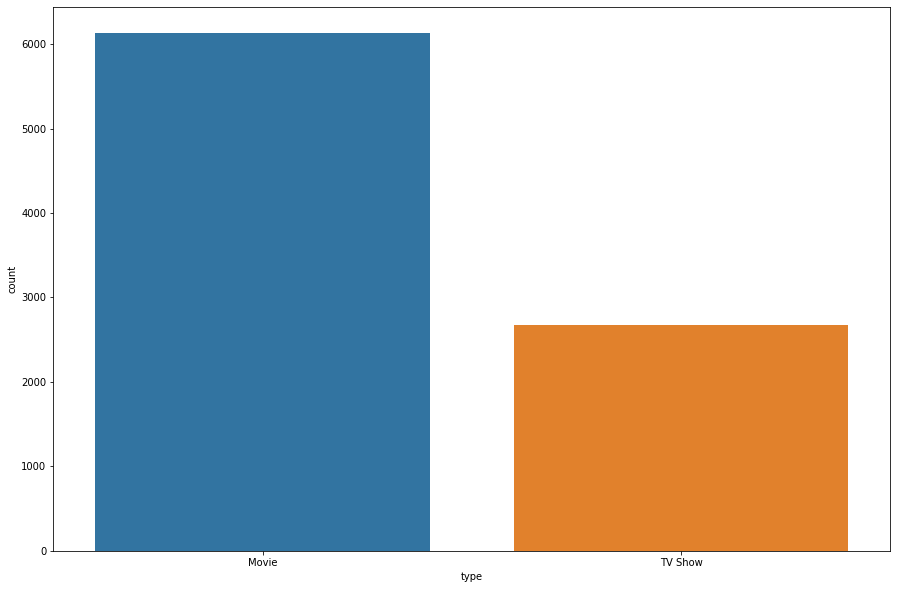

In [104]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='type')

Explore percentage of type(movies and tv show)

([<matplotlib.patches.Wedge at 0x7f60df3c4ad0>,
 [Text(-0.6935511949239879, 0.9792786835316639, 'Tv Show'),
  Text(0.6357552620136554, -0.8976721265706921, 'Movie')],
 [Text(-0.4045715303723262, 0.5712458987268039, '69.62%'),
  Text(0.3467755974619938, -0.48963934176583196, '30.38%')])

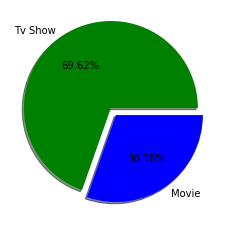

In [105]:
x = df.type.value_counts()
label=['Tv Show','Movie']
color =['green','blue']
explode = (0.1,0)

plt.pie(x, labels =label,colors= color,explode=explode,shadow = True,autopct ='%1.2f%%')


okay let's explore the top 20 movie sorted by release_year

In [106]:
top_20= df_movies.sort_values(by='release_year',ascending = False).head(20)
top_20[['title','release_year']]

,title,release_year
362,dynasty warriors,2021
484,myriam fares: the journey,2021
481,alan saldaña: locked up,2021
480,xtreme,2021
479,trippin' with the kandasamys,2021
478,sweet & sour,2021
475,breaking boundaries: the science of our planet,2021
473,kitty love: an homage to cats,2021
470,tragic jungle,2021
468,awake,2021


we can see the rating of this movies

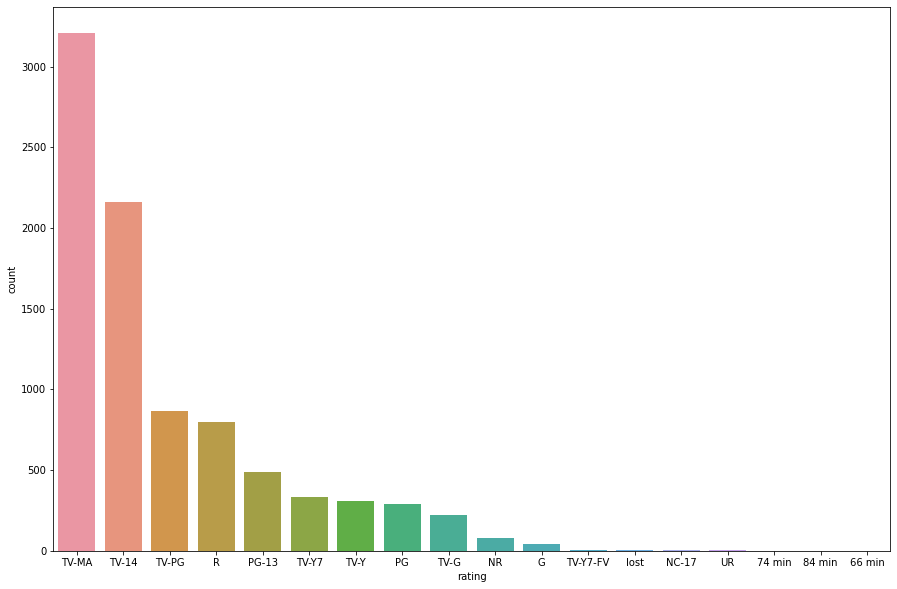

In [107]:
fig = plt.figure(figsize = (15, 10))
sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:20])

In [108]:
movie_title_per_year = df.groupby("release_year")['title'].count()
movie_title_per_year.sort_values(ascending=False)

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1961       1
1947       1
1966       1
1925       1
Name: title, Length: 74, dtype: int64

Now let's preparing for modeling

In [109]:
df_movies.columns

Index(['index', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'extract_value'],
      dtype='object')

we need to combine some cols 

In [110]:
cols=['director', 'cast', 'country','listed_in',  'description']
     

In [111]:
def combine_cols(row):
  return row['director']+" "+row['country']+" "+row["cast"]+" "+row["listed_in"]+" "+row["description"]
df_movies['combine_cols'] = df_movies.apply(combine_cols,axis =1)
print('combine_cols : ',df_movies['combine_cols'])


combine_cols :  0       Kirsten Johnson United States absent Documenta...
1       Robert Cullen, José Luis Ucha not_register Van...
2       Haile Gerima United States, Ghana, Burkina Fas...
3       Theodore Melfi United States Melissa McCarthy,...
4       Christian Schwochow Germany, Czech Republic Lu...
                              ...                        
6126    Majid Al Ansari United Arab Emirates, Jordan A...
6127    David Fincher United States Mark Ruffalo, Jake...
6128    Ruben Fleischer United States Jesse Eisenberg,...
6129    Peter Hewitt United States Tim Allen, Courtene...
6130    Mozez Singh India Vicky Kaushal, Sarah-Jane Di...
Name: combine_cols, Length: 6131, dtype: object


know we use CountVectorizer() to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors

In [113]:

cv = CountVectorizer()
count_matrix = cv.fit_transform(df_movies['combine_cols'])

Also need to computes the cosine distance value between a bag of words and a set of TF-IDF weight vectors


In [114]:
cosine_sim = cosine_similarity(count_matrix)


know we need to get index of movies from title

In [115]:
def movie_index_from_title(index):
  return df_movies[df_movies.index==index]['title'].values[0]
def movie_index_from_title(df,index):
  return df[df.index==index]['title'].values(0)
def movie_index_from_title(df,title):
  return df[df.title==title]['index'].values(0)
   


Now and finally build function take sdow id and return the recommendation movies for him

In [ ]:
def recommend_movies(show_id):
  try:
        movie_index =movie_index_from_title (df_movies,recommend_movies)
        similar_movies  = list(enumerate(cosine_sim[movie_index]))
        sorted_similar_movies = sorted(similar_movies,key = lambda x:x[1],reverse=True)[1:]
        i = 0 
        print(recommend_movies + " \n")
    
        for element in sorted_similar_movies:
            print(movie_index_from_title(df_movies,element[0]))
            i = i+1
            if i>=10:
                break
  except:
        print("Movie not found in netflix")


recommend_movies()